In [1]:
from  scipy.special import j1
from kSZ_forecast_general_func import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
Grid = 512
MAS  = "NGP"
Snapshot = 2448

snap_info=Snap_Info()

Thelen = Boxlen/h/cosmo.comoving_distance(z=snap_info.get_redshift(Snapshot)).value
cnorm=ne0*sigma_t*Mpc2m*Boxlen*1.0/Grid*(1+snap_info.get_redshift(Snapshot))**2/h  # proj mom: km/h -> dkSZ/CMB

the_los=(45)*np.pi/180
n_rsd=np.array([np.cos(the_los),np.sin(the_los),0])

if Snapshot == 1631:
    n_gal = np.array([3, 3.3, 3.6])*10**-4
if Snapshot == 2448:
    n_gal = np.array([6, 6.6, 7.2])*10**-4
n_halo =np.array([    1,     2,     3,     5,    7,     9,    30,   70])*10**-4 #8
lgM_min=np.array([12.86, 12.68, 12.55, 12.41, 12.3, 12.23, 11.82, 11.5])

In [9]:
filename

'/home/chenzy/code/kSZ_forecast/stack_prediction_results/HOD_random_S1631G512_gal_HSC_NB912_den0vel0l1l0ACT000_seed1.npz'

# tomography

[[ 2.95337882  0.          0.        ]
 [17.79500543  0.          0.        ]
 [18.88936552  0.          0.        ]]
[0. 0. 0.]
[0.0003  0.00033 0.00036]
[[ 3.12386111  0.          0.        ]
 [17.46324103  0.          0.        ]
 [19.56375005  0.          0.        ]]
[0. 0. 0.]
[0.0003  0.00033 0.00036]
[[ 3.0903957   0.          0.        ]
 [18.13960123  0.          0.        ]
 [19.39470529  0.          0.        ]]
[0. 0. 0.]
[0.0003  0.00033 0.00036]
[[ 3.05406207  0.          0.        ]
 [17.88789952  0.          0.        ]
 [19.2127205   0.          0.        ]]
[0. 0. 0.]
[0.0003  0.00033 0.00036]


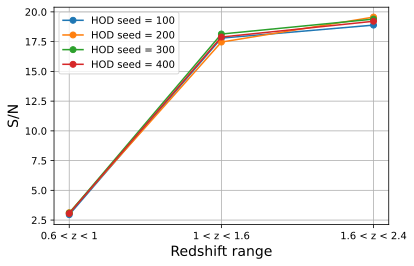

In [8]:
Grid = 512

den_method = 0   #NGP
vel_method = 0   #thetap
HOD_random_seeds = [100, 200, 300, 400]

fig, ax =plt.subplots()
SN = np.zeros((3,3))
for j in [0, 1, 2, 3]:
    for ii in [0,1,2]: #redshift bin
        redshift_bin = ii
        if redshift_bin == 0:
            Snapshot = 2746#2448
            n_gal = np.array([4, 4.4, 4.8])*10**-4
            HOD_model = "DESI" 
            gll = [0, 1, 2]
            rr = "0.6 < z < 1"
        if redshift_bin == 1:
            Snapshot = 2181#2448
            n_gal = np.array([6, 6.6, 7.2])*10**-4
            HOD_model = "HSC_NB816"
            gll = [0,1,2]
            rr = "1 < z < 1.6"
        if redshift_bin == 2:
            Snapshot = 1631
            n_gal = np.array([3, 3.3, 3.6])*10**-4
            HOD_model = "HSC_NB912"
            gll = [0,1,2]
            rr = "1.6 < z < 2.4"

        for i in [0]:
        
            filename =  "tomography_prediction_results/RedshiftBin"+str(redshift_bin)+"S"+str(Snapshot)+"G"+str(Grid)+"_gal_"+HOD_model+"_den"+str(den_method)+"vel"+str(vel_method)+"l"+str(i)+"_seed"+str(HOD_random_seeds[j])+".npz"
            if not os.path.exists(filename):
                print(filename)
                continue
            d = np.load(filename)
            SN[ii, i] = d["SN"]
    print(SN)
    print(SN[:,2]/SN[:,0])
    print(n_gal)

    ax.plot(range(3), SN[:,0], '-o', label = r"HOD seed = "+str(HOD_random_seeds[j]))

#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
'''
ax.set_xscale("log")
label_ngal = ["%.5f" % number for number in n_gal]
print(n_gal)
ax.set_xticks(n_gal, labels=label_ngal)
'''

#ax.set_xlabel("Halos for velocity reconstruction \n"+r"$n [\rm h/cMpc]^{3}$", fontsize=14)
ax.set_xlabel("Redshift range", fontsize=14)
ax.set_ylabel("S/N", fontsize=14)
#label_ngal = ["%.5f" % number for number in n_gal]
#ax.set_xticks(n_gal, labels=label_ngal)
ax.set_xticks(range(3), labels=["0.6 < z < 1", "1 < z < 1.6", "1.6 < z < 2.4"])
#ax.set_title("S/N prediction: Tomography method\n PFS "+r"$\times$ ACT HOD:"+HOD_model+", "+rr, fontsize=14)
ax.grid()
ax.legend()
%config InlineBackend.figure_format = 'svg'
#fig.savefig("figure/tomography_SN.pdf")
#%config InlineBackend.figure_format = 'png'

# stack

0.8936504412303007


/opt/conda/conda-4.12.0/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


1.3693063937629155
1.7496692809192809


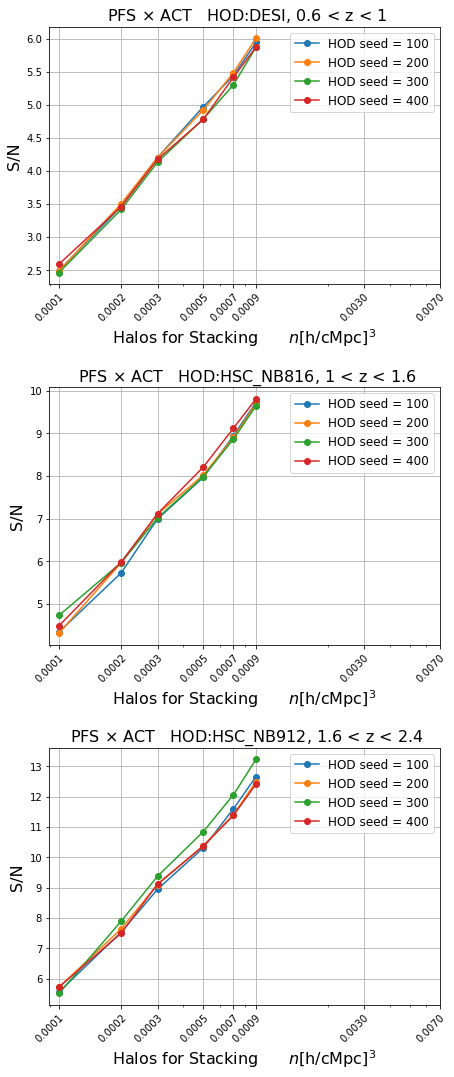

In [13]:
fig, ax = plt.subplots(3,1, figsize = (7, 18), gridspec_kw={"hspace":0.4})


Grid = 512

den_method = 0   #NGP
vel_method = 0   #thetap
HOD_random_seed = 100

for ii in [0, 1, 2]:
    redshift_bin = ii

    if redshift_bin == 0:
        Snapshot = 2746
        n_gal = np.array([4, 4.4, 4.8])*10**-4
        HOD_model = "DESI" 
        gll = [0, 1, 2]
        rr = "0.6 < z < 1"
        f_sky_factor = np.sqrt(1.38/1.2**3)
    if redshift_bin == 1:
        Snapshot = 2181
        n_gal = np.array([6, 6.6, 7.2])*10**-4
        HOD_model = "HSC_NB816"
        gll = [0,1,2]
        rr = "1 < z < 1.6"
        f_sky_factor = np.sqrt(3.24/1.2**3)
    if redshift_bin == 2:
        Snapshot = 1631
        n_gal = np.array([3, 3.3, 3.6])*10**-4
        HOD_model = "HSC_NB912"
        gll = [0,1,2]
        rr = "1.6 < z < 2.4"
        f_sky_factor = np.sqrt(5.29/1.2**3)

    Thelen = Boxlen/h/cosmo.comoving_distance(z=snap_info.get_redshift(Snapshot)).value
    print(f_sky_factor)
    for HOD_random_seed in [100, 200, 300, 400]:
        SN = np.zeros((3, 8, 50))
        for i in [0]:
            galaxy_number_density_label = gll[i]
            for j in range(6):
                mass_selection_label2 = j
                for k in range(50):
                    filename = "/home/chenzy/code/kSZ_forecast/stack_prediction_results/mbin_RedshiftBin"+ str(redshift_bin)+"S"+str(Snapshot)+"G"+str(Grid)+"_HOD_"+HOD_model+"_den"+str(den_method)+"vel"+str(vel_method)+"l"+str(gll[galaxy_number_density_label])+"l"+str(mass_selection_label2)+"ACT"+str(k).zfill(3)+"_seed"+str(HOD_random_seed)+".npz"
                    #print(filename)
                    if not os.path.exists(filename):
                        print("no", gll[i], j, k)
                        print(filename)
                        continue
                    d = np.load(filename)
                    stack_signal = d["stack_signal"]
                    r = (d["r_true_rec"])
                    stack_mean, corv = error_esti_jackknife(stack_signal)
                    C_ = pseudo_inverse(corv,3)
                    chi_null = cal_chi_square(stack_mean, stack_mean, C_)
                    if chi_null<0:print(i, j, k)
                    SN[i, j, k] = np.sqrt(chi_null)*f_sky_factor

                #break
                #print(np.mean(SN[i,j,:]))
            SN_array = np.zeros(8)
            temp = np.sum(SN[i, :,:], axis = 1)/ np.sum(SN[i, :,:]>0, axis = 1)
            for jj in range(8):
                SN_array[jj] = np.sqrt(np.sum(temp[:jj+1]**2))
            ax[ii].plot(n_halo, SN_array, "-o", label = r"HOD seed = "+str(HOD_random_seed))
        #ax[ii].plot(n_halo, np.sum(SN[i, :,:], axis = 1)/ np.sum(SN[i, :,:]>0, axis = 1), "-o", label = r"$\bar n_g = $"+str(np.round(n_gal[i]*10**4,3))+r"$\times 10^{-4}, r=$"+str(np.round(r, 4)))
        #break

    plt.setp(ax[ii].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    ax[ii].legend(fontsize =12)
    ax[ii].set_xscale("log")
    label_nhalo = ["%.4f" % number for number in n_halo]
    ax[ii].set_xticks(n_halo, labels=label_nhalo)
    ax[ii].set_xlabel("Halos for Stacking \t"+r"$n [\rm h/cMpc]^{3}$", fontsize=16)
    ax[ii].set_ylabel("S/N", fontsize=16)
    ax[ii].set_title(" PFS "+r"$\times$ ACT   HOD:"+HOD_model+", "+rr, fontsize=16)
    #ax.set_ylim(10, 22)
    ax[ii].grid()
%config InlineBackend.figure_format = 'svg'
#fig.savefig("figure/stack_SN.pdf")
%config InlineBackend.figure_format = 'png'

0.8936504412303007


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.3693063937629155


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.7496692809192809


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


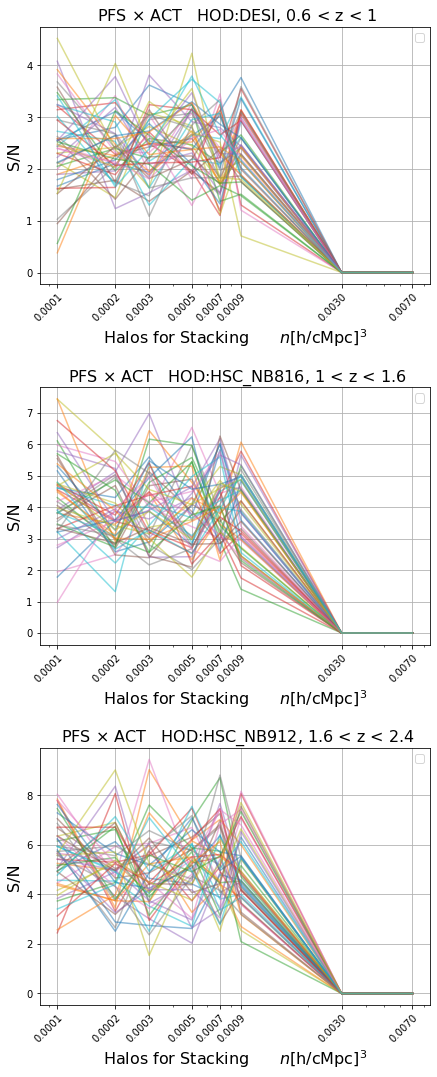

In [16]:
fig, ax = plt.subplots(3,1, figsize = (7, 18), gridspec_kw={"hspace":0.4})


Grid = 512

den_method = 0   #NGP
vel_method = 0   #thetap
HOD_random_seed = 100

for ii in [0, 1, 2]:
    redshift_bin = ii

    if redshift_bin == 0:
        Snapshot = 2746
        n_gal = np.array([4, 4.4, 4.8])*10**-4
        HOD_model = "DESI" 
        gll = [0, 1, 2]
        rr = "0.6 < z < 1"
        f_sky_factor = np.sqrt(1.38/1.2**3)
    if redshift_bin == 1:
        Snapshot = 2181
        n_gal = np.array([6, 6.6, 7.2])*10**-4
        HOD_model = "HSC_NB816"
        gll = [0,1,2]
        rr = "1 < z < 1.6"
        f_sky_factor = np.sqrt(3.24/1.2**3)
    if redshift_bin == 2:
        Snapshot = 1631
        n_gal = np.array([3, 3.3, 3.6])*10**-4
        HOD_model = "HSC_NB912"
        gll = [0,1,2]
        rr = "1.6 < z < 2.4"
        f_sky_factor = np.sqrt(5.29/1.2**3)

    Thelen = Boxlen/h/cosmo.comoving_distance(z=snap_info.get_redshift(Snapshot)).value
    print(f_sky_factor)
    for HOD_random_seed in [100]:
        SN = np.zeros((3, 8, 50))
        for i in [0]:
            galaxy_number_density_label = gll[i]
            for j in range(6):
                mass_selection_label2 = j
                for k in range(50):
                    filename = "/home/chenzy/code/kSZ_forecast/stack_prediction_results/mbin_RedshiftBin"+ str(redshift_bin)+"S"+str(Snapshot)+"G"+str(Grid)+"_HOD_"+HOD_model+"_den"+str(den_method)+"vel"+str(vel_method)+"l"+str(gll[galaxy_number_density_label])+"l"+str(mass_selection_label2)+"ACT"+str(k).zfill(3)+"_seed"+str(HOD_random_seed)+".npz"
                    #print(filename)
                    if not os.path.exists(filename):
                        print("no", gll[i], j, k)
                        print(filename)
                        continue
                    d = np.load(filename)
                    stack_signal = d["stack_signal"]
                    r = (d["r_true_rec"])
                    stack_mean, corv = error_esti_jackknife(stack_signal)
                    C_ = pseudo_inverse(corv,3)
                    chi_null = cal_chi_square(stack_mean, stack_mean, C_)
                    if chi_null<0:print(i, j, k)
                    SN[i, j, k] = np.sqrt(chi_null)*f_sky_factor

                #break
                #print(np.mean(SN[i,j,:]))
            ax[ii].plot(n_halo, SN[0, :, :], alpha=0.5)
            

    plt.setp(ax[ii].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    ax[ii].legend(fontsize =12)
    ax[ii].set_xscale("log")
    label_nhalo = ["%.4f" % number for number in n_halo]
    ax[ii].set_xticks(n_halo, labels=label_nhalo)
    ax[ii].set_xlabel("Halos for Stacking \t"+r"$n [\rm h/cMpc]^{3}$", fontsize=16)
    ax[ii].set_ylabel("S/N", fontsize=16)
    ax[ii].set_title(" PFS "+r"$\times$ ACT   HOD:"+HOD_model+", "+rr, fontsize=16)
    #ax.set_ylim(10, 22)
    ax[ii].grid()
%config InlineBackend.figure_format = 'svg'
#fig.savefig("figure/stack_SN.pdf")
%config InlineBackend.figure_format = 'png'

1.7496692809192809


NameError: name 'r' is not defined

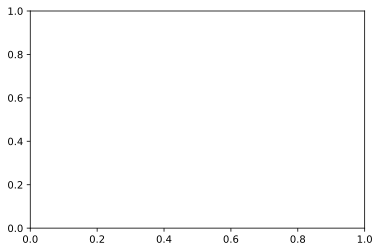

In [2]:
Grid = 512

den_method = 0   #NGP
vel_method = 0   #thetap
redshift_bin = 2
i = 1 # n_gal
j = 0 # n_group


if redshift_bin == 0:
    Snapshot = 2448
    n_gal = np.array([4, 4.4, 4.8])*10**-4
    HOD_model = "DESI" 
    gll = [3, 4, 5]
    rr = "0.6 < z < 1"
    f_sky_factor = np.sqrt(1.38/1.2**3)
if redshift_bin == 1:
    Snapshot = 2448
    n_gal = np.array([6, 6.6, 7.2])*10**-4
    HOD_model = "HSC_NB816"
    gll = [0,1,2]
    rr = "1 < z < 1.6"
    f_sky_factor = np.sqrt(3.24/1.2**3)
if redshift_bin == 2:
    Snapshot = 1631
    n_gal = np.array([3, 3.3, 3.6])*10**-4
    HOD_model = "HSC_NB912"
    HOD_model = "DESI" 
    gll = [0,1,2]
    rr = "1.6 < z < 2.4"
    f_sky_factor = np.sqrt(5.29/1.2**3)
snap_info=Snap_Info()
Thelen = Boxlen/h/cosmo.comoving_distance(z=snap_info.get_redshift(Snapshot)).value
print(f_sky_factor)

fig, ax = plt.subplots()
SN = np.zeros((10, 50))

galaxy_number_density_label = gll[i]
mass_selection_label2 = j
for hod_seed in [100, 200, 300, 400]:
    for k in range(50):
        filename = "/home/chenzy/code/kSZ_forecast/stack_prediction_results/HOD_random_S"+str(Snapshot)+"G"+str(Grid)+"_gal_"+HOD_model+"_den"+str(den_method)+"vel"+str(vel_method)+"l"+str(galaxy_number_density_label)+"l"+str(mass_selection_label2)+"ACT"+str(k).zfill(3)+"_seed"+str(rr)+".npz"
        #print(filename)
        if not os.path.exists(filename):
            print("no", r, k)
            #print(filename)
            continue
        d = np.load(filename)
        stack_signal = d["stack_signal"]
        r = (d["r_true_rec"])
        stack_mean, corv = error_esti_jackknife(stack_signal)
        C_ = pseudo_inverse(corv,3)
        chi_null = cal_chi_square(stack_mean, stack_mean, C_)
        if chi_null<0:print(i, j, k)
        SN[rr-1, k] = np.sqrt(chi_null)*f_sky_factor
            
        #break
        #print(np.mean(SN[i,j,:]))
ax.plot(np.mean(SN, axis=1))
ax.grid()